In [75]:
import analysis_functions as af
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from pathlib import Path
import os


#filename = sys.argv[1]
filename = "monte_carlo_em_4_2_1_1_0_2_1_0_5"

Path("plots/" + filename).mkdir(parents=True, exist_ok=True)

data = np.loadtxt(r"../data/" + filename +".txt", skiprows = 2)
energy = data[:,0]
magnet = data[:,1]

plt.style.use("seaborn")


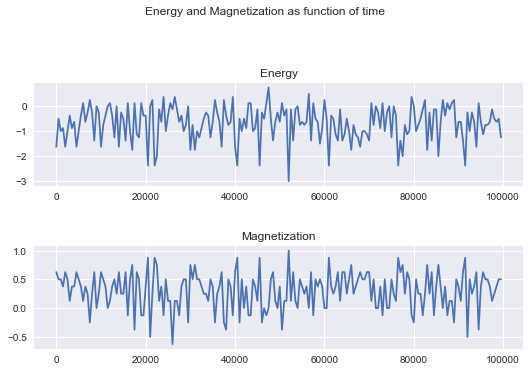

In [76]:
#basic plotting
fig,axs = plt.subplots(2)
fig.suptitle("Energy and Magnetization as function of time")

mc_time = np.arange(0,len(energy), 500)

axs[0].plot(mc_time,energy[::500])
axs[1].plot(mc_time,magnet[::500])
axs[0].set_title("Energy")
axs[1].set_title("Magnetization")
fig.tight_layout(pad = 3.0)
fig.savefig("plots/"+ filename +"/EM.png")

Read an observable from the data file, creates the folder for the plots and prints the data shape

## Thermalization study

Study the state of thermalization by choosing a perc percentage parameter and 
checking whether the variance and mean are consistent in the sample and in the total data set


98000
14


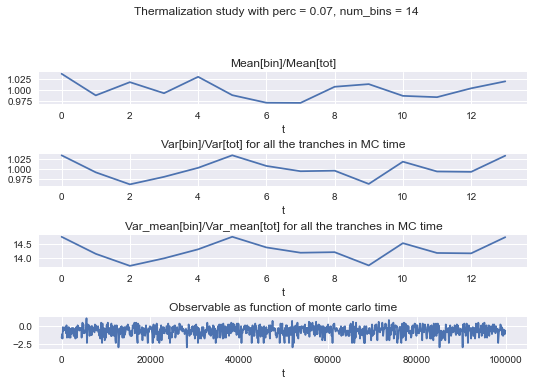

In [144]:
#energy study

perc = 0.07
mean_ens = af.mean(energy)
var_ens = af.var(energy)
var_mean_ens = af.mean_var(energy)
N = int(np.floor(perc*len(energy[:])))

num = int(np.floor(1/perc))
print(num*N)

thermaliz = np.array([[af.mean(energy[N*k:N*k+N]),af.var(energy[N*k:N*k+N]),
                            af.mean_var(energy[N*k:N*k+N])] 
                          for k in range(num)])


print(len(thermaliz))
x = np.arange(0,num)
time = np.arange(len(energy))
#fig = plt.figure(num = None, figsize=(12,12), dpi= 80, edgecolor="k")
#fig.canvas.set_window_title("Thermalization study")



fig,axs = plt.subplots(4)
fig.suptitle("Thermalization study with perc = {}, num_bins = {}".format(perc,num))
fig.tight_layout(pad=3.0)
axs[0].plot(x,thermaliz[:,0]/mean_ens)
axs[1].plot(x,thermaliz[:,1]/var_ens)
axs[2].plot(x,thermaliz[:,2]/var_mean_ens)
axs[3].plot(time[::100],energy[::100])
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")
axs[3].set_xlabel("t")
axs[0].title.set_text("Mean[bin]/Mean[tot]")
axs[1].title.set_text("Var[bin]/Var[tot] for all the tranches in MC time")
axs[2].title.set_text("Var_mean[bin]/Var_mean[tot] for all the tranches in MC time")
axs[3].title.set_text("Observable as function of monte carlo time")
plt.show()
fig.savefig("plots/"+ filename +"/Therm_energy.png")

98000
14


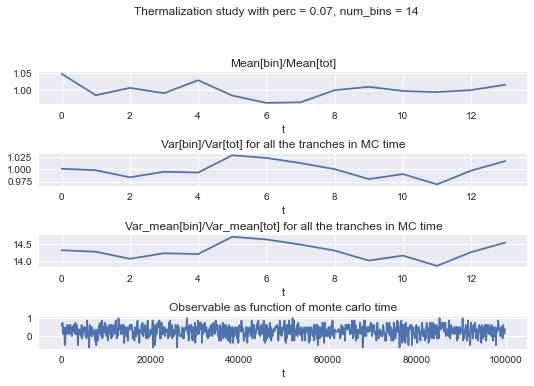

In [145]:
#magnetation study

perc = 0.07
mean_ens = af.mean(magnet)
var_ens = af.var(magnet)
var_mean_ens = af.mean_var(magnet)
N = int(np.floor(perc*len(magnet[:])))

num = int(np.floor(1/perc))
print(num*N)

thermaliz = np.array([[af.mean(magnet[N*k:N*k+N]),af.var(magnet[N*k:N*k+N]),
                            af.mean_var(magnet[N*k:N*k+N])] 
                          for k in range(num)])


print(len(thermaliz))
x = np.arange(0,num)
time = np.arange(len(magnet))
#fig = plt.figure(num = None, figsize=(12,12), dpi= 80, edgecolor="k")
#fig.canvas.set_window_title("Thermalization study")



fig,axs = plt.subplots(4)
fig.suptitle("Thermalization study with perc = {}, num_bins = {}".format(perc,num))
fig.tight_layout(pad=3.0)
axs[0].plot(x,thermaliz[:,0]/mean_ens)
axs[1].plot(x,thermaliz[:,1]/var_ens)
axs[2].plot(x,thermaliz[:,2]/var_mean_ens)
axs[3].plot(time[::100],magnet[::100])
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")
axs[3].set_xlabel("t")
axs[0].title.set_text("Mean[bin]/Mean[tot]")
axs[1].title.set_text("Var[bin]/Var[tot] for all the tranches in MC time")
axs[2].title.set_text("Var_mean[bin]/Var_mean[tot] for all the tranches in MC time")
axs[3].title.set_text("Observable as function of monte carlo time")
plt.show()
fig.savefig("plots/" + filename + "/Therm_magnetization.png")


## Find the autocorrelation length of the dataset
Plot C(t)/C(0) where t is the distance between MCMC time as function 
of t and fit the exponential e(-t/tau)

In [146]:
#cut the portion of the data that isn't thermalized, a general cutoff of MC time > 20000 based on the data

energy = energy[20000::]
magnet = magnet[20000::]
#tmax to be chosen depending on the data set
tmax = 10
time = np.arange(tmax)


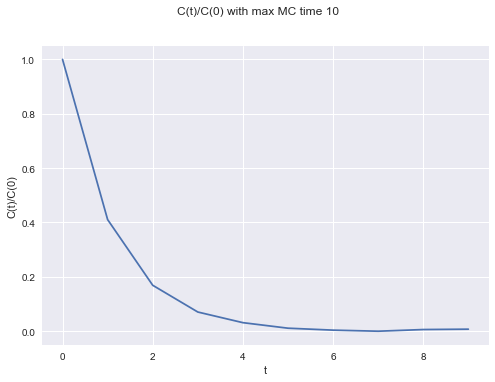

In [147]:
#energy
#create autocorrelation array

corr_en = 1/af.var(energy)*np.array([af.autocorrelation(energy,t)  for t in range(tmax)])

fig,ax = plt.subplots()
fig.suptitle("C(t)/C(0) with max MC time {}".format(tmax))
ax.plot(time,corr_en)
ax.set_xlabel("t")
ax.set_ylabel("C(t)/C(0)")
plt.savefig("plots/" + filename + "/C(t)_energy.png")


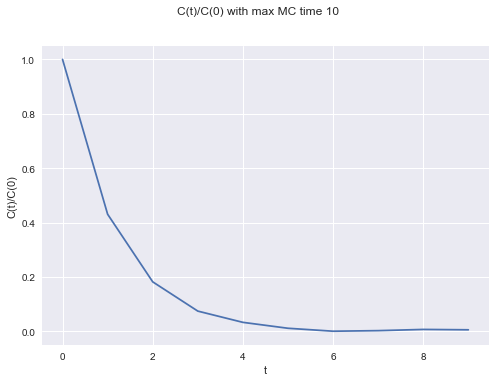

In [148]:
#magnetizaztion
#create autocorrelation array

corr_mg = 1/af.var(magnet)*np.array([af.autocorrelation(magnet,t)  for t in range(tmax)])

fig,ax = plt.subplots()
fig.suptitle("C(t)/C(0) with max MC time {}".format(tmax))
ax.plot(time,corr_mg)
ax.set_xlabel("t")
ax.set_ylabel("C(t)/C(0)")
plt.savefig("plots/" + filename + "/C(t)_magnet.png")


## Fitting

Correlation mean 0.17096536574672236	Correlation var 0.3181501469980548



'print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n"\n      .format(af.mean(energy), af.mean_var(energy), af.mean_var_autocorr(energy,tau)))'

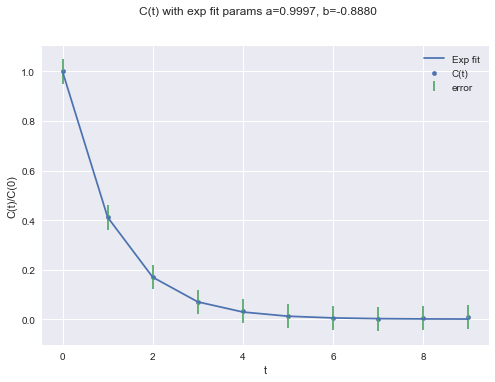

In [149]:
#energy 
#find the parameters for the fit
from scipy.optimize import curve_fit

popt = curve_fit(lambda t,a,b: a*np.exp(b*t),  time, corr_en,p0=(1,0))
## Autocorrelation study
#fit exponential
#error propagation
#error in C(t)
a = popt[0][0]
b = popt[0][1]
corr_en_mean = af.mean(corr_en)
corr_en_var = af.var(corr_en)
err_bars = 1/np.sqrt(af.chisquared(corr_en)*(tmax-2))*np.sqrt(corr_en_var)*np.ones(tmax)
print("Correlation mean {}\tCorrelation var {}\n".format(corr_en_mean,np.sqrt(corr_en_var)))
#scipi optimize coefficients

fit_exp = np.array([a*np.exp(b*t) for t in time])
plt.plot(fit_exp, label="Exp fit")
plt.scatter(time,corr_en,s=20, label="C(t)", )
plt.errorbar(time,corr_en,yerr=err_bars, linestyle="None", label="error")
plt.ylabel("C(t)/C(0)")
plt.xlabel("t")
plt.suptitle("C(t) with exp fit params a={:.4f}, b={:.4f}".format(a,b))
plt.savefig("plots/" + filename + "/C(t)_fit.png")
plt.legend()
#autocorrelation time
#tau = -1/b
#print("Chisquared = {}",format(af.chisquared(fit_exp - corr_t)))

'''print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n"
      .format(af.mean(energy), af.mean_var(energy), af.mean_var_autocorr(energy,tau)))'''



Correlation mean 0.17448499803473375	Correlation var 0.3198306912087289



'print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n"\n      .format(af.mean(energy), af.mean_var(energy), af.mean_var_autocorr(energy,tau)))'

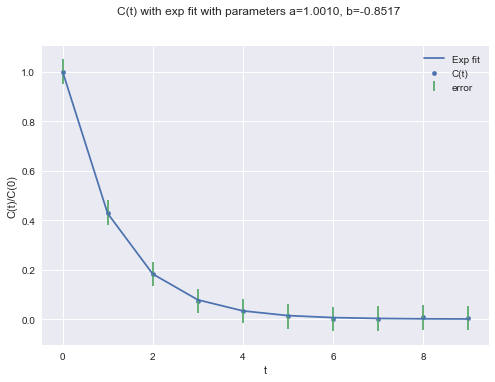

In [150]:
#magnetization
#find the parameters for the fit
from scipy.optimize import curve_fit

popt = curve_fit(lambda t,a,b: a*np.exp(b*t),  time, corr_mg,p0=(1,0))
## Autocorrelation study
#fit exponential
#error propagation
#error in C(t)
a = popt[0][0]
b = popt[0][1]
corr_mg_mean = af.mean(corr_mg)
corr_mg_var = af.var(corr_mg)
err_bars = 1/np.sqrt(af.chisquared(corr_mg)*(tmax-2))*np.sqrt(corr_mg_var)*np.ones(tmax)
print("Correlation mean {}\tCorrelation var {}\n".format(corr_mg_mean,np.sqrt(corr_mg_var)))
#scipi optimize coefficients

fit_exp = np.array([a*np.exp(b*t) for t in time])
plt.plot(fit_exp, label="Exp fit")
plt.scatter(time,corr_mg,s=20, label="C(t)", )
plt.errorbar(time,corr_mg,yerr=err_bars, linestyle="None", label="error")
plt.ylabel("C(t)/C(0)")
plt.xlabel("t")
plt.suptitle("C(t) with exp fit with parameters a={:.4f}, b={:.4f}".format(a,b))
plt.savefig("plots/" + filename + "/C(t)_fit.png")
plt.legend()
#autocorrelation time
#tau = -1/b
#print("Chisquared = {}",format(af.chisquared(fit_exp - corr_t)))

'''print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n"
      .format(af.mean(energy), af.mean_var(energy), af.mean_var_autocorr(energy,tau)))'''




range = [0,1]
10000 data 

autocorrelation of time NUMBERmOCKDATA/RANDOM NUMBERS USED

each random number is a bin

on each bin conmpute autocorrelation function
fit exponential on each autocorrelation
compute for all


I need to do the fit first ( bin with JK)



Error propagation with JK:
1) Bin data as X(S_k) with m = around k integration time
2) Generate JK bin X_JK
3)